<a href="https://colab.research.google.com/github/ApoorvaChinta/USA-House-Price-Prediction/blob/main/USHOUSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/daksh-intwala/House-Price-Prediction--Regression-Anaylsis/master/main_dataset.csv')

In [ ]:
data.head()

,sr_no,date,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,1,01-01-00,100.552,281083,4.3,1727,8.15,101.488,17.087,74.248,142.4,103.091,1.48,4.6669
1,2,01-02-00,101.339,281299,4.3,1692,8.25,101.547,17.087,74.270,142.7,103.151,1.48,4.6801
2,3,01-03-00,102.127,281531,4.3,1651,8.27,101.620,17.087,74.227,143.2,103.059,1.48,4.7108
3,4,01-04-00,102.922,281763,4.4,1597,8.23,101.690,16.594,74.505,143.2,103.038,1.44,4.7668
4,5,01-05-00,103.677,281996,4.4,1543,8.13,101.731,16.594,74.089,142.2,103.009,1.44,4.7546


In [ ]:
data.columns

Index(['sr_no', 'date', 'target_home_price', 'population',
       'monthly_supply_houses', 'new_permits_thousands', 'mortgage_rate',
       'gdp_monthly', 'hcai', 'employment_percentage', 'ppi_const_goods',
       'cci_real_estate', 'deliquency_rate', 'm3_trillion'],
      dtype='object')

In [ ]:
data.isnull().sum()
#no null values

sr_no                    0
date                     0
target_home_price        0
population               0
monthly_supply_houses    0
new_permits_thousands    0
mortgage_rate            0
gdp_monthly              0
hcai                     0
employment_percentage    0
ppi_const_goods          0
cci_real_estate          0
deliquency_rate          0
m3_trillion              0
dtype: int64

Exploratory data analysis

In [ ]:
#removing date and serial number from the data
data=data.drop(['sr_no','date'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="target_home_price", axis=1), data["target_home_price"], 
                                                    test_size= 0.30, random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([2.48706287, 0.76086508, 1.35388747, 1.22869449, 1.41852562,
       1.29026855, 1.57954534, 1.74547119, 0.93041653, 1.20519878,
       2.40619187])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

population               2.487063
m3_trillion              2.406192
ppi_const_goods          1.745471
employment_percentage    1.579545
gdp_monthly              1.418526
new_permits_thousands    1.353887
hcai                     1.290269
mortgage_rate            1.228694
deliquency_rate          1.205199
cci_real_estate          0.930417
monthly_supply_houses    0.760865
dtype: float64

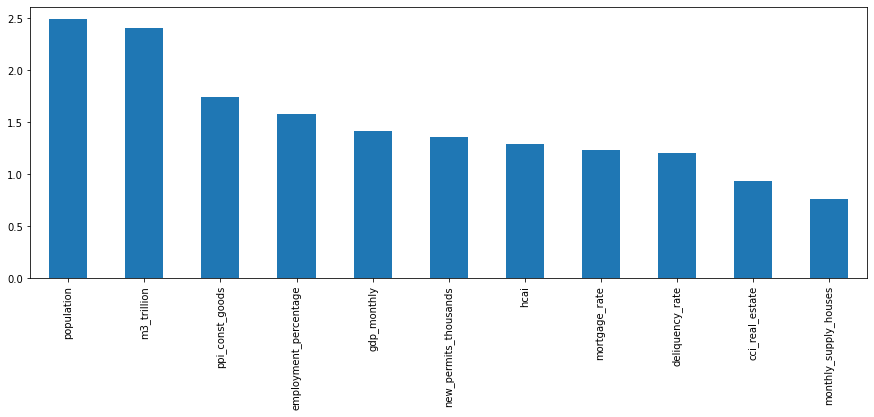

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
#since we have less number of features and also they are highly interconnected with eachother we can pick all the features to build the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
n_data=pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index) 
n_data

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,0.000000,0.000000,0.091954,0.693714,0.911488,0.970310,0.759407,0.981921,0.022886,0.991418,0.097087,0.000000
1,0.005704,0.004330,0.091954,0.673714,0.930320,0.975683,0.759407,0.983468,0.025871,1.000000,0.097087,0.000896
2,0.011415,0.008981,0.091954,0.650286,0.934087,0.982332,0.759407,0.980443,0.030846,0.986840,0.097087,0.002980
3,0.017177,0.013631,0.103448,0.619429,0.926554,0.988707,0.734100,1.000000,0.030846,0.983836,0.092233,0.006782
4,0.022649,0.018302,0.103448,0.588571,0.907721,0.992441,0.734100,0.970735,0.020896,0.979688,0.092233,0.005954
...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.908855,0.991320,0.000000,0.614857,0.214689,0.465847,0.020276,0.469152,0.913433,0.387212,0.038835,0.946265
249,0.934134,0.994467,0.000000,0.618286,0.207156,0.477869,0.023151,0.530918,0.912438,0.411100,0.054612,0.956183
250,0.957428,0.997214,0.057471,0.676000,0.207156,0.489617,0.023151,0.533873,0.901493,0.404234,0.054612,0.970379
251,0.978642,0.999118,0.034483,0.711429,0.145009,0.511566,0.023151,0.544144,0.937313,0.404663,0.054612,0.982002


Model Building

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
cvs=cross_val_score(lr,X_train,y_train,cv=3)
print(cvs*100)

[97.45340614 97.5985513  97.15903381]


LASSO

In [ ]:
from sklearn.linear_model import Lasso
l=Lasso()
cvs=cross_val_score(l,X_train,y_train,cv=3)
print(cvs*100)

[97.06616957 97.25633667 95.17223135]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+02, tolerance: 1.119e+01



RIDGE

In [ ]:
from sklearn.linear_model import Ridge
r=Ridge()
cvs=cross_val_score(r,X_train,y_train,cv=3)
print(cvs*100)

[97.48212158 97.61342092 97.1498902 ]


XGBOOST

In [ ]:
import xgboost
xg=xgboost.XGBRegressor()
cvs=cross_val_score(xg,X_train,y_train,cv=3)
print(cvs*100)


[09:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[99.39274925 98.98264854 98.50910181]


HYPERPARAMETER SELECTION

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
min_child_weight=[1,2,3,4]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
base_score=[0.25,0.50,0.75,1]

hyp_grid={'min_child_weight':min_child_weight,'n_estimators':n_estimators,'max_depth':max_depth,'learning_rate':learning_rate,'booster':booster,'base_score':base_score}

random_cv=RandomizedSearchCV(estimator=xg,param_distributions=hyp_grid,cv=3,n_iter=20,scoring='neg_mean_absolute_error',n_jobs=4,return_train_score=True,random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

[10:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=20, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, learning_rate=0.05, min_child_weight=4,
             n_estimators=1100)

In [ ]:
xg=xgboost.XGBRegressor(base_score=0.75, learning_rate=0.05, min_child_weight=4,
             n_estimators=1100)


In [ ]:
xg.fit(X_train,y_train)

[10:11:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.75, learning_rate=0.05, min_child_weight=4,
             n_estimators=1100)

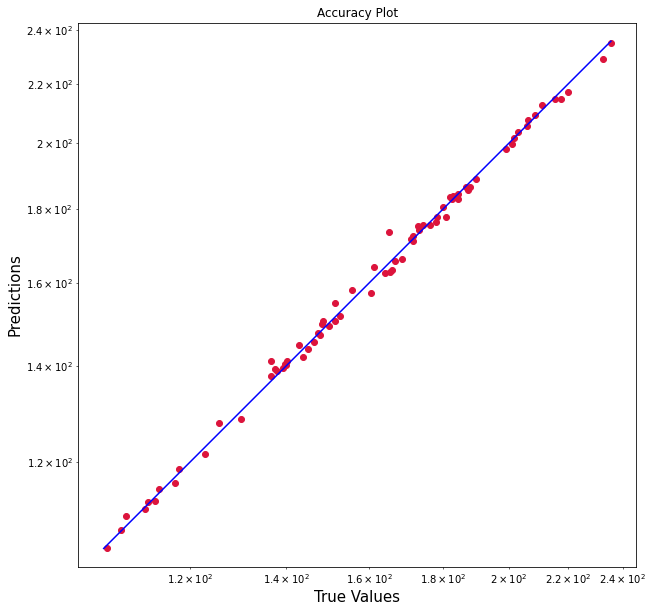

In [ ]:
y_pred=xg.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
r2_score(y_test, y_pred)

1.8553687078019663


0.996540830492596